Let's vizualize the sequence of observations from a spot in the sky.  

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

In [2]:
class PassMetric(metrics.BaseMetric):
    """
    Just pass the entire array through
    """
    def __init__(self, cols=None, **kwargs):
        if cols is None:
            cols= []
        super(PassMetric, self).__init__(col=cols, metricDtype='object', **kwargs)
    def run(self, dataSlice, slicePoint=None):
        return dataSlice

In [5]:
runName = 'enigma_1189'

opsdb = db.OpsimDatabase(runName + '_sqlite.db')
outDir = 'Transients'
resultsDb = db.ResultsDb(outDir=outDir)

IOError: Sqlite database file "enigma_1189_sqlite.db" not found.

In [5]:
metric=PassMetric(cols=['expMJD', 'fiveSigmaDepth', 'filter'])
ra = [0.]
dec = [np.radians(-30.)]
slicer = slicers.UserPointsSlicer(ra=ra,dec=dec)
sqlconstraint = 'night < 365'

In [6]:
bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, runName=runName)
bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint night < 365
Found 271946 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [7]:
filters = np.unique(bundle.metricValues[0].compressed()['filter'])
colors = {'u':'b','g':'g','r':'r','i':'purple',"z":'y',"y":'magenta'}

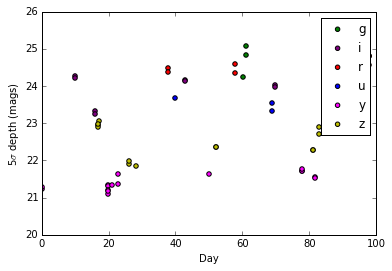

In [8]:
mv = bundle.metricValues[0].compressed()
for filterName in filters:
    good = np.where(mv['filter'] == filterName)
    plt.scatter(mv['expMJD'][good]-mv['expMJD'].min(), mv['fiveSigmaDepth'][good], 
                c=colors[filterName], label=filterName)
plt.xlabel('Day')
plt.ylabel('5$\sigma$ depth (mags)')
plt.xlim([0,100])
plt.legend(scatterpoints=1)